<a href="https://colab.research.google.com/github/hideaki-kyutech/test/blob/master/03_softcomputing_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [149]:
# make it possible to use breast_cancer dataset in scikit-learn
from sklearn.datasets import load_breast_cancer

In [150]:
# load the data
data = load_breast_cancer()

In [151]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [152]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [153]:
# 'data' (the attribute) means the input data
print(data.data.shape)
# it has 569 samples, 30 features
print(type(data.data))

(569, 30)
<class 'numpy.ndarray'>


In [154]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [155]:
# their meaning is not lost
data.target_names
# 'malignant' = bad-type , 'benign' = good-type 

array(['malignant', 'benign'], dtype='<U9')

In [156]:
# there are also 569 corresponding targets
print(data.target.shape)
print(type(data.target))

(569,)
<class 'numpy.ndarray'>


In [157]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [174]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [175]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [177]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [178]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(28,)


In [179]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [180]:
print(type(y_train))
print(y_train.shape)

<class 'torch.Tensor'>
torch.Size([28, 1])


In [181]:
# Train the model
n_epochs = 1000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()
    
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4011, Test Loss: 0.4082
Epoch 100/1000, Train Loss: 0.2837, Test Loss: 0.2871
Epoch 150/1000, Train Loss: 0.2152, Test Loss: 0.2276
Epoch 200/1000, Train Loss: 0.1703, Test Loss: 0.1926
Epoch 250/1000, Train Loss: 0.1389, Test Loss: 0.1699
Epoch 300/1000, Train Loss: 0.1160, Test Loss: 0.1543
Epoch 350/1000, Train Loss: 0.0986, Test Loss: 0.1429
Epoch 400/1000, Train Loss: 0.0852, Test Loss: 0.1344
Epoch 450/1000, Train Loss: 0.0745, Test Loss: 0.1279
Epoch 500/1000, Train Loss: 0.0658, Test Loss: 0.1227
Epoch 550/1000, Train Loss: 0.0587, Test Loss: 0.1185
Epoch 600/1000, Train Loss: 0.0527, Test Loss: 0.1150
Epoch 650/1000, Train Loss: 0.0477, Test Loss: 0.1122
Epoch 700/1000, Train Loss: 0.0434, Test Loss: 0.1098
Epoch 750/1000, Train Loss: 0.0397, Test Loss: 0.1078
Epoch 800/1000, Train Loss: 0.0365, Test Loss: 0.1061
Epoch 850/1000, Train Loss: 0.0337, Test Loss: 0.1046
Epoch 900/1000, Train Loss: 0.0312, Test Loss: 0.1034
Epoch 950/1000, Train Loss: 0

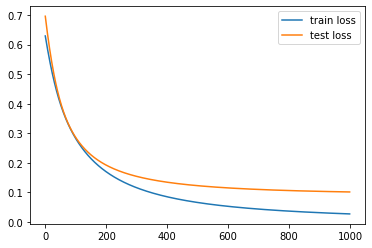

In [182]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [168]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9558, Test acc: 0.9605


In [169]:
# Look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1592, -0.2401, -0.1884, -0.2021, -0.3382, -0.3670, -0.3905, -0.2017,
                       -0.3692,  0.4654, -0.2568,  0.2365, -0.2061, -0.2702,  0.0525, -0.0086,
                        0.4635, -0.3769,  0.1257,  0.7060, -0.3652, -0.2582, -0.4271, -0.2682,
                       -0.2184, -0.2477, -0.3255, -0.2782, -0.2597, -0.2504]])),
             ('0.bias', tensor([0.3051]))])

In [170]:
# Save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [171]:
!ls

mymodel.pt  sample_data


In [172]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [173]:
# Evaluate the new model
# Results should be the same!
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9558, Test acc: 0.9605


In [ ]:
# Download the model
from google.colab import files
files.download('mymodel.pt')

## レポート課題
* BCEの学習曲線の代わりに、ACCの学習曲線を描き、テスト比率33%の時と、テスト比率95%の時を比較せよ。



